In [31]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


import matplotlib.pyplot as plt


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)



In [32]:
import numpy as np
from sklearn.linear_model import Perceptron

In [33]:
X = np.load('/Users/kevinc/Downloads/smiley_x.npy')
y = np.load('/Users/kevinc/Downloads/smiley_y.npy')

In [34]:
X = X.reshape((X.shape[0], -1))



In [35]:
# dc = {}
# ind = 0 # this corresponds to the column with the names
# for row in X:
#     dc[row[ind]] = row[1:]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=21)   #set train set to very small due to high accuracy


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import seaborn as sns
from sklearn.neural_network import MLPClassifier

In [38]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X_train, y_train)
y_pred=per_clf.predict(X_test)
print ("Accuracy ",accuracy_score(y_test,y_pred))

Accuracy  0.9405940594059405


In [39]:
cross_val_score(per_clf,X_train,y_train,cv=10,scoring="accuracy")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

<AxesSubplot:>

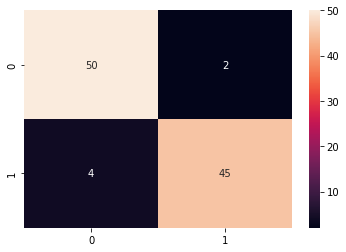

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

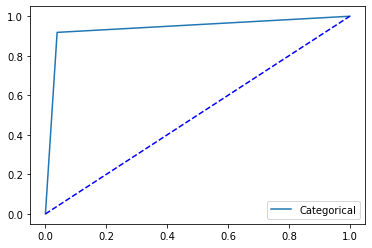

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [42]:
cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(y_pred, y_test))
print('recall = ', recall_score(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
50 2 4 45
sensitivity = 0.5263157894736842
specificity = 0.6666666666666666
precision = 0.9183673469387755
recall =  0.9574468085106383
AUC: 0.940


In [43]:
# per_clf = Perceptron(max_iter=100,tol=0.1,eta0=1,alpha=0.9 , random_state=42, layer)
# per_clf.fit(X_train, y_train)
# y_pred=per_clf.predict(X_test)
# print ("Accuracy ",accuracy_score(y_test,y_pred))
# print("cross val accuracy ",cross_val_score(per_clf,X_train,y_train,cv=10,scoring="accuracy"))
# sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)



# cm = confusion_matrix(y_test, y_pred)
# tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
# print('tp', 'fp', 'tn', 'fn')
# print(tp, fp, tn, fn)

# print('sensitivity =' ,(tp/(tp+fn)))
# print('specificity =' ,(tn / (tn+fp)))
# print('precision =' ,precision_score(y_pred, y_test))
# print('recall = ', recall_score(y_pred, y_test))
# auc = roc_auc_score(y_test, y_pred)
# print('AUC: %.3f' % auc)


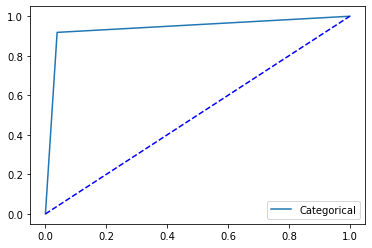

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

smaller the learning rate, the more accurate

alpha doesnt change anything, regularization is not used

max_iteration doesnt change anything

l1_ratio=0.015,penalty='elasticnet' drastically change accuracy, all the wrong value is false negative

tol no affect

shuffle=False much higher accuracy

Accuracy  0.7425742574257426
cross val accuracy  [1.   1.   1.   0.75 0.75 0.75 0.5  0.5  1.   1.  ]
tp fp tn fn
31 21 5 44
sensitivity = 0.41333333333333333
specificity = 0.19230769230769232
precision = 0.8979591836734694
recall =  0.676923076923077
AUC: 0.747


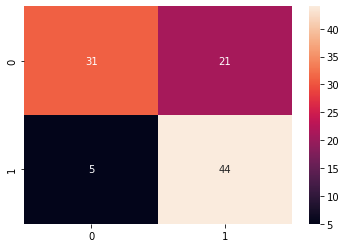

In [45]:
mlp = MLPClassifier(max_iter=1000,tol=0.1, random_state=42)
mlp.fit(X_train, y_train)
y_pred=mlp.predict(X_test)
print ("Accuracy ",accuracy_score(y_test,y_pred))
print("cross val accuracy ",cross_val_score(mlp,X_train,y_train,cv=10,scoring="accuracy"))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)



cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(y_pred, y_test))
print('recall = ', recall_score(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)


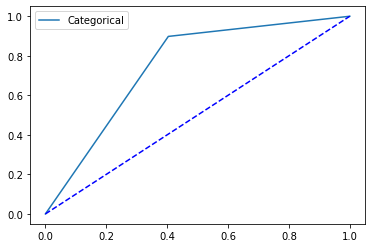

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

hidden layer size  at 2 is 0.5, 20 at 0.8, 50 at 0.6
learning rate, adoptive 0.7425742574257426

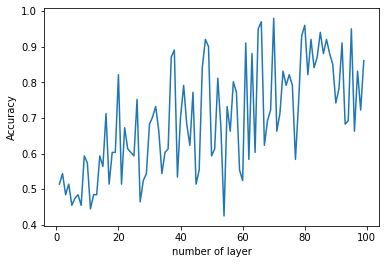

In [47]:
ay=[]
ax=[]

for n in range(1,100):
    mlp = MLPClassifier(max_iter=100,tol=0.1, random_state=42,hidden_layer_sizes=n)
    mlp.fit(X_train, y_train)
    y_pred=mlp.predict(X_test)
    ax.append(n)
    ay.append(accuracy_score(y_test,y_pred))

plt.plot(ax,ay)

plt.xlabel('number of layer') 
plt.ylabel('Accuracy') 

plt.show()

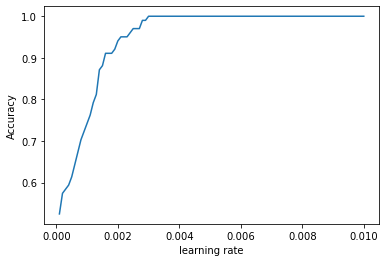

In [48]:
ay=[]
ax=[]

count = 0.0001
while count < 0.01:
    mlp = MLPClassifier(max_iter=100,tol=0.1, random_state=42,learning_rate_init=count)
    mlp.fit(X_train, y_train)
    y_pred=mlp.predict(X_test)
    ax.append(count)
    ay.append(accuracy_score(y_test,y_pred))
    count = count+0.0001
plt.plot(ax,ay)

plt.xlabel('learning rate') 
plt.ylabel('Accuracy') 

plt.show()

/Users/kevinc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/kevinc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/kevinc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/kevinc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/kevinc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611

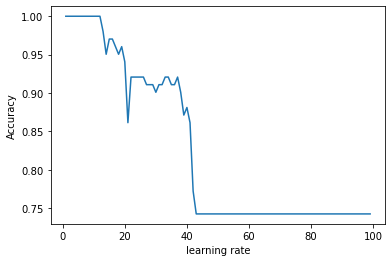

In [49]:
ay=[]
ax=[]

count = 1
while count < 100:
    mlp = MLPClassifier(max_iter=100,tol=0.1, random_state=42,batch_size=count)
    mlp.fit(X_train, y_train)
    y_pred=mlp.predict(X_test)
    ax.append(count)
    ay.append(accuracy_score(y_test,y_pred))
    count = count+1
plt.plot(ax,ay)

plt.xlabel('learning rate') 
plt.ylabel('Accuracy') 

plt.show()

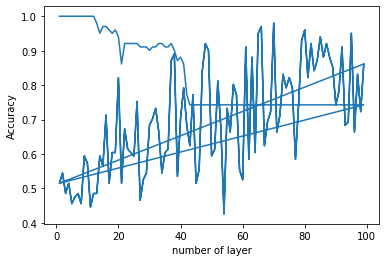

In [51]:
for n in range(1,100):
    mlp = MLPClassifier(max_iter=100,tol=0.1, random_state=42,hidden_layer_sizes=n)
    mlp.fit(X_train, y_train)
    y_pred=mlp.predict(X_test)
    ax.append(n)
    ay.append(accuracy_score(y_test,y_pred))

plt.plot(ax,ay)

plt.xlabel('number of layer') 
plt.ylabel('Accuracy') 

plt.show()